# Dow Jones Industrial Average (^DJI)

Source
- [Yahoo finance ^DJIA](https://finance.yahoo.com/quote/%5EDJI/history?period1=475804800&period2=1601251200&interval=1d&filter=history&frequency=1d)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dow-Jones-Industrial-Average-(^DJI)" data-toc-modified-id="Dow-Jones-Industrial-Average-(^DJI)-1">Dow Jones Industrial Average (^DJI)</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2">Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Describe-Data" data-toc-modified-id="Describe-Data-3.1">Describe Data</a></span></li><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.2">Sample the data</a></span></li></ul></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-4">Rata Die</a></span></li><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-5">Draw Plots</a></span></li><li><span><a href="#Extract-only-the-desired-data" data-toc-modified-id="Extract-only-the-desired-data-6">Extract only the desired data</a></span></li><li><span><a href="#Quantize-(normalize)-the-data" data-toc-modified-id="Quantize-(normalize)-the-data-7">Quantize (normalize) the data</a></span></li><li><span><a href="#Fill-Empty-Dates" data-toc-modified-id="Fill-Empty-Dates-8">Fill Empty Dates</a></span><ul class="toc-item"><li><span><a href="#Create-Empty-DataFrame" data-toc-modified-id="Create-Empty-DataFrame-8.1">Create Empty DataFrame</a></span></li><li><span><a href="#Insert-missing-values" data-toc-modified-id="Insert-missing-values-8.2">Insert missing values</a></span></li></ul></li><li><span><a href="#Averages" data-toc-modified-id="Averages-9">Averages</a></span><ul class="toc-item"><li><span><a href="#Insert-averages-to-DataFrame" data-toc-modified-id="Insert-averages-to-DataFrame-9.1">Insert averages to DataFrame</a></span></li></ul></li><li><span><a href="#Position-on-given-Date" data-toc-modified-id="Position-on-given-Date-10">Position on given Date</a></span></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-11">Save DataFrame to CSV file</a></span></li></ul></div>

# Set Up

In [1]:
show_help = false
include("MarketIndicators.jl") 
println()

# Read Data

In [2]:
#data = available_datasets() # uncomment to see all available datasets

In [3]:
dataset_file_name = "^DJI.csv"
df = fetch_dataset(dataset_file_name, "yyyy_mm_dd")
record_count = size(df)[1]
println("data dimentions: ", size(df) )

data dimentions: (9004, 7)


## Describe Data

In [4]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,1985-01-29,,2020-10-16,9004,,String
2,Open,10193.7,1243.71,10102.1,29440.5,,,Float64
3,High,10256.6,1251.21,10175.6,29568.6,,,Float64
4,Low,10128.7,1235.53,10030.6,29406.8,,,Float64
5,Close,10196.3,1242.05,10103.6,29551.4,,,Float64
6,Adj Close,10196.3,1242.05,10103.6,29551.4,,,Float64
7,Volume,1.45751e8,2530000,1.1162e8,2190810000,,,Int64


## Sample the data

In [5]:
columns = preview_data(df) # uncomment to see the data
println()

13×7 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Adj Close │
│     │ String     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64   │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 1985-01-29 │ 1277.72 │ 1295.49 │ 1266.89 │ 1292.62 │ 1292.62   │
│ 2   │ 1988-01-19 │ 1944.13 │ 1977.29 │ 1923.41 │ 1936.34 │ 1936.34   │
│ 3   │ 1991-01-07 │ 2542.82 │ 2563.37 │ 2514.11 │ 2522.77 │ 2522.77   │
│ 4   │ 1993-12-22 │ 3745.2  │ 3762.75 │ 3744.87 │ 3762.19 │ 3762.19   │
│ 5   │ 1996-12-10 │ 6464.7  │ 6512.39 │ 6463.94 │ 6473.25 │ 6473.25   │
│ 6   │ 1999-12-01 │ 10876.5 │ 11000.8 │ 10859.7 │ 10998.4 │ 10998.4   │
│ 7   │ 2002-11-26 │ 8844.12 │ 8844.4  │ 8670.18 │ 8676.42 │ 8676.42   │
│ 8   │ 2005-11-17 │ 10677.0 │ 10727.7 │ 10665.5 │ 10720.2 │ 10720.2   │
│ 9   │ 2008-11-11 │ 8864.32 │ 8867.91 │ 8560.71 │ 8693.96 │ 8693.96   │
│ 10  │ 2011-11-02 │ 11658.5 │ 11876.8 │ 11658.5 │ 11836.0 │ 11836.0   │
│ 11  │ 2014-10-28 │ 16825.2 │ 17006

# Rata Die

In [6]:
insert!(df, 1, zeros(Int64, record_count), :Rata_Die)
update_rata_die!(df, 1, 2)
first(df, 6)

,Rata_Die,Date,Open,High,Low,Close,Adj Close,Volume
,Int64,String,Float64,Float64,Float64,Float64,Float64,Int64
1,724670,1985-01-29,1277.72,1295.49,1266.89,1292.62,1292.62,13560000
2,724671,1985-01-30,1297.37,1305.1,1278.93,1287.88,1287.88,16820000
3,724672,1985-01-31,1283.24,1293.4,1272.64,1286.77,1286.77,14070000
4,724673,1985-02-01,1276.94,1286.11,1269.77,1277.72,1277.72,10980000
5,724676,1985-02-04,1272.08,1294.94,1268.99,1290.08,1290.08,11630000
6,724677,1985-02-05,1294.06,1301.13,1278.6,1285.23,1285.23,13800000


In [7]:
columns = preview_data(df)
println()

13×8 DataFrame
│ Row │ Rata_Die │ Date       │ Open    │ High    │ Low     │ Close   │
│     │ Int64    │ String     │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼──────────┼────────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 724670   │ 1985-01-29 │ 1277.72 │ 1295.49 │ 1266.89 │ 1292.62 │
│ 2   │ 725755   │ 1988-01-19 │ 1944.13 │ 1977.29 │ 1923.41 │ 1936.34 │
│ 3   │ 726839   │ 1991-01-07 │ 2542.82 │ 2563.37 │ 2514.11 │ 2522.77 │
│ 4   │ 727919   │ 1993-12-22 │ 3745.2  │ 3762.75 │ 3744.87 │ 3762.19 │
│ 5   │ 729003   │ 1996-12-10 │ 6464.7  │ 6512.39 │ 6463.94 │ 6473.25 │
│ 6   │ 730089   │ 1999-12-01 │ 10876.5 │ 11000.8 │ 10859.7 │ 10998.4 │
│ 7   │ 731180   │ 2002-11-26 │ 8844.12 │ 8844.4  │ 8670.18 │ 8676.42 │
│ 8   │ 732267   │ 2005-11-17 │ 10677.0 │ 10727.7 │ 10665.5 │ 10720.2 │
│ 9   │ 733357   │ 2008-11-11 │ 8864.32 │ 8867.91 │ 8560.71 │ 8693.96 │
│ 10  │ 734443   │ 2011-11-02 │ 11658.5 │ 11876.8 │ 11658.5 │ 11836.0 │
│ 11  │ 735534   │ 2014-10-28 │ 16825.2 │ 17006.4

In [8]:
columns

8-element Array{String,1}:
 "Rata_Die"
 "Date"
 "Open"
 "High"
 "Low"
 "Close"
 "Adj Close"
 "Volume"

# Draw Plots

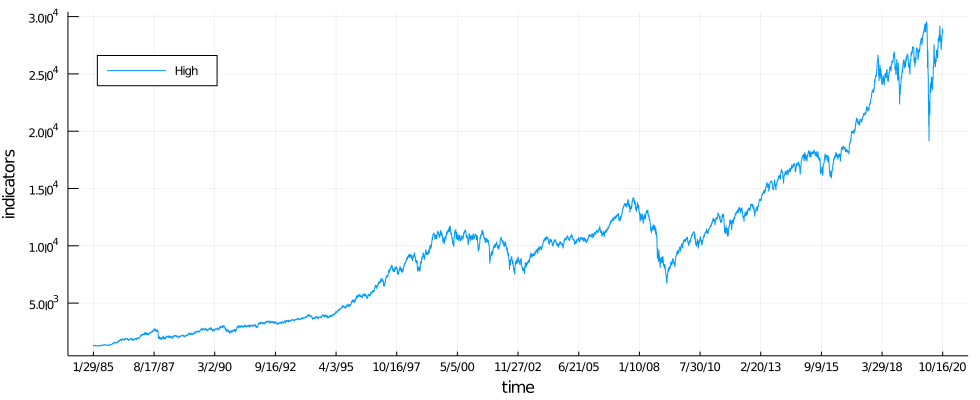

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [9]:
using Plots

record_count = size(df)[1]
rows = 1:record_count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,4]    ], # y-axis
    label    = [  columns[4]   "" ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Extract only the desired data

In [10]:
using DataFrames
df = DataFrame( Day = df[:,1], 
                Date = df[:,2],
                High = df[:,4]
               )

columns = preview_data(df)
println()

13×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ String     │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 724670 │ 1985-01-29 │ 1295.49 │
│ 2   │ 725755 │ 1988-01-19 │ 1977.29 │
│ 3   │ 726839 │ 1991-01-07 │ 2563.37 │
│ 4   │ 727919 │ 1993-12-22 │ 3762.75 │
│ 5   │ 729003 │ 1996-12-10 │ 6512.39 │
│ 6   │ 730089 │ 1999-12-01 │ 11000.8 │
│ 7   │ 731180 │ 2002-11-26 │ 8844.4  │
│ 8   │ 732267 │ 2005-11-17 │ 10727.7 │
│ 9   │ 733357 │ 2008-11-11 │ 8867.91 │
│ 10  │ 734443 │ 2011-11-02 │ 11876.8 │
│ 11  │ 735534 │ 2014-10-28 │ 17006.4 │
│ 12  │ 736621 │ 2017-10-19 │ 23167.2 │
│ 13  │ 737711 │ 2020-10-13 │ 28808.8 │
 Dataset dimentions: (9004, 3)

 Column numbering:
1 Day
2 Date
3 High



# Quantize (normalize) the data

In [11]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df, 3)

columns = preview_data(df)
println()

bias for 0 value: -0.044185261106501034
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = 1251.209961
maximum = 29568.570313
Save these values for later to run model preditions
13×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ String     │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 724670 │ 1985-01-29 │ -128.0  │
│ 2   │ 725755 │ 1988-01-19 │ -121.0  │
│ 3   │ 726839 │ 1991-01-07 │ -116.0  │
│ 4   │ 727919 │ 1993-12-22 │ -105.0  │
│ 5   │ 729003 │ 1996-12-10 │ -81.0   │
│ 6   │ 730089 │ 1999-12-01 │ -40.0   │
│ 7   │ 731180 │ 2002-11-26 │ -60.0   │
│ 8   │ 732267 │ 2005-11-17 │ -43.0   │
│ 9   │ 733357 │ 2008-11-11 │ -59.0   │
│ 10  │ 734443 │ 2011-11-02 │ -32.0   │
│ 11  │ 735534 │ 2014-10-28 │ 14.0    │
│ 12  │ 736621 │ 2017-10-19 │ 69.0    │
│ 13  │ 737711 │ 2020-10-13 │ 120.0   │
 Dataset dimentions: (9004, 3)

 Column numbering:
1 Day
2 Date
3 High



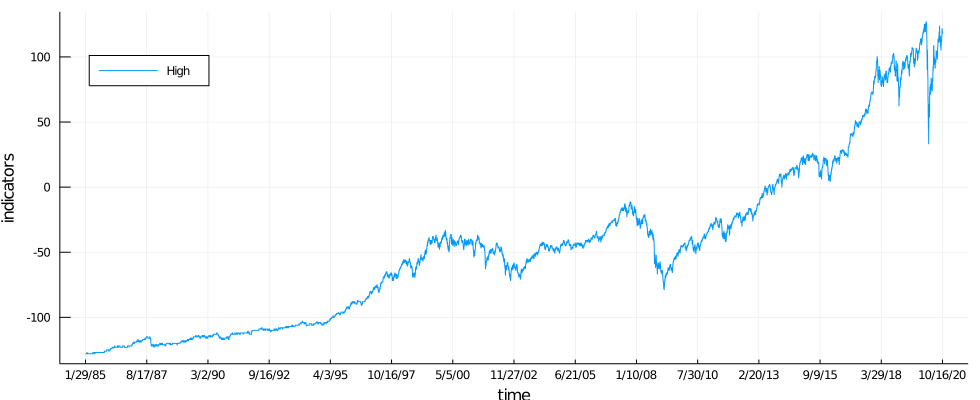

In [12]:
using Plots

count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3] ""   ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Fill Empty Dates

## Create Empty DataFrame

## Insert missing values

In [13]:
for i in 1:count-1
    day_this = df[i,1]
    day_next = df[i+1,1]
    
    value = df[i,3] # assuming that the last known value is still valid
    
    # loop thru all days you need to insert
    # if there is no gap, nothing will happen
    for day in day_this+1:day_next-1
        date_string = Dates.format(rata2datetime(day), "yyyy-mm-dd")
        push!(df, [ day date_string value ])
    end
    
end

sort!(df, [:Day]);
count = size(df)[1]
columns = preview_data(df)
println()

13×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ String     │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 724670 │ 1985-01-29 │ -128.0  │
│ 2   │ 725757 │ 1988-01-21 │ -122.0  │
│ 3   │ 726844 │ 1991-01-12 │ -117.0  │
│ 4   │ 727931 │ 1994-01-03 │ -105.0  │
│ 5   │ 729018 │ 1996-12-25 │ -81.0   │
│ 6   │ 730105 │ 1999-12-17 │ -37.0   │
│ 7   │ 731192 │ 2002-12-08 │ -61.0   │
│ 8   │ 732279 │ 2005-11-29 │ -41.0   │
│ 9   │ 733366 │ 2008-11-20 │ -66.0   │
│ 10  │ 734453 │ 2011-11-12 │ -30.0   │
│ 11  │ 735540 │ 2014-11-03 │ 18.0    │
│ 12  │ 736627 │ 2017-10-25 │ 72.0    │
│ 13  │ 737714 │ 2020-10-16 │ 120.0   │
 Dataset dimentions: (13045, 3)

 Column numbering:
1 Day
2 Date
3 High



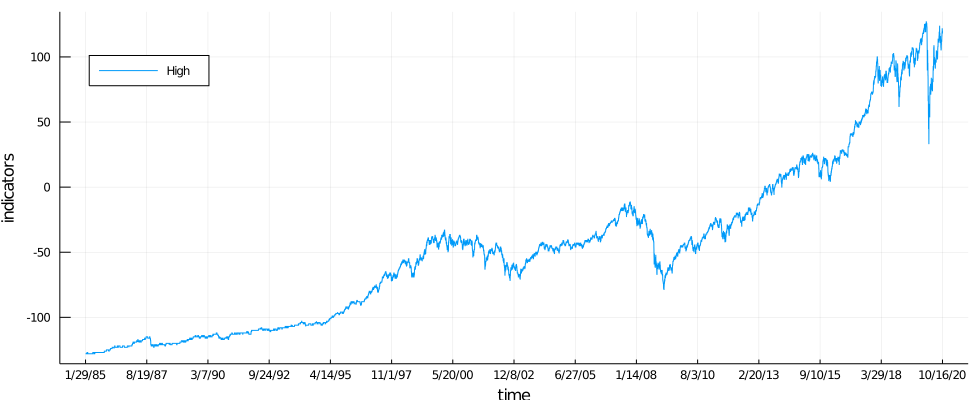

In [14]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [ columns[3]    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Averages

In [15]:

averages005 = calculate_average(df, 5, 3)
averages030 = calculate_average(df, 30, 3)
averages090 = calculate_average(df, 90, 3)
averages180 = calculate_average(df, 180, 3)
averages365 = calculate_average(df, 365, 3)
println()

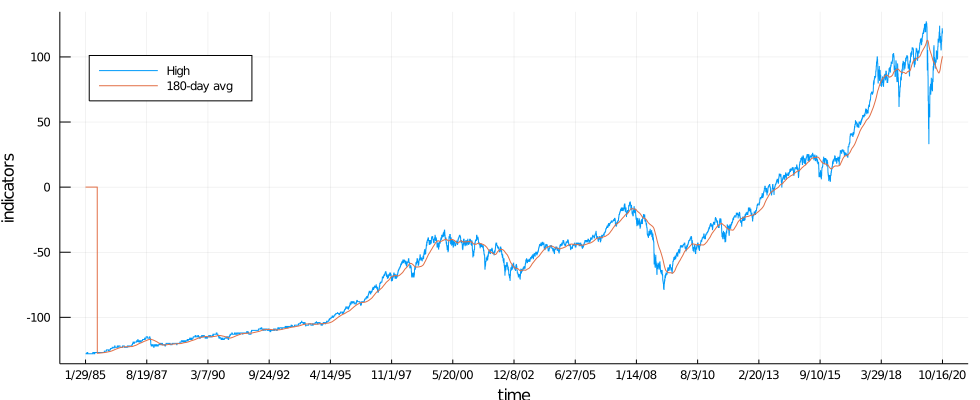

In [16]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot!(          dates, # x-axis: dates
               [  averages180    ], # y-axis
    label    = [ "180-day avg"    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

## Insert averages to DataFrame

In [17]:
insertcols!(df, 4,  :Avg005 => averages005, makeunique=true)
insertcols!(df, 5,  :Avg030 => averages030, makeunique=true)
insertcols!(df, 6,  :Avg090 => averages090, makeunique=true)
insertcols!(df, 7,  :Avg180 => averages180, makeunique=true)
insertcols!(df, 8,  :Avg365 => averages365, makeunique=true)
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,731192.0,724670,731192.0,737714,,,Int64
2,Date,,1985-01-29,,2020-10-16,13045,,String
3,High,-46.8343,-128.0,-48.0,127.0,,,Float64
4,Avg005,-46.833,-128.0,-47.4,126.4,,,Float64
5,Avg030,-46.8205,-128.0,-47.2,123.63,,,Float64
6,Avg090,-46.7859,-127.97,-46.73,119.87,,,Float64
7,Avg180,-46.6966,-127.64,-46.8,112.75,,,Float64
8,Avg365,-46.465,-126.98,-46.87,105.19,,,Float64


# Position on given Date

In [18]:
position = position_on_date(df, "2020-09-30")
position[1:3]

3-element Array{Float64,1}:
 113.0
 113.0
 113.0

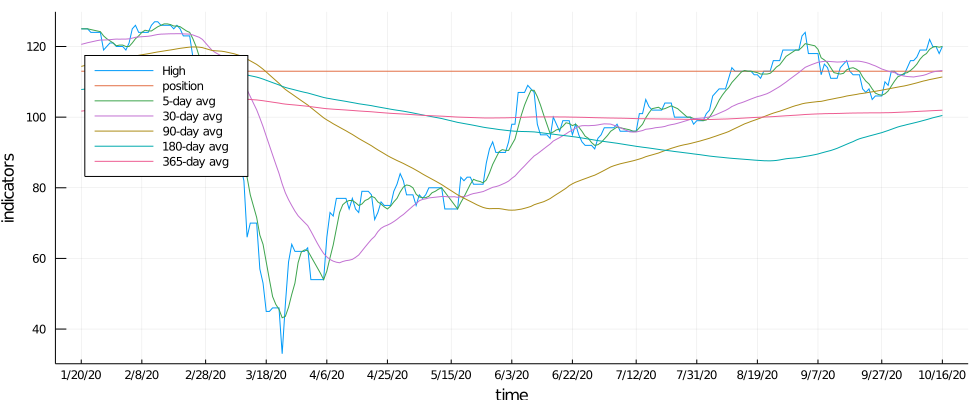

In [23]:
using Plots
count = size(df)[1]
rows = count-270:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(      dates, # x-axis: dates
        [  df[rows,3] position[rows] averages005[rows] averages030[rows] averages090[rows] averages180[rows] averages365[rows] ], # y-axis
    label    = 
        [ columns[3] "position" "5-day avg" "30-day avg" "90-day avg" "180-day avg" "365-day avg" ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

[back to top](#Table-of-Contents)
<hr/>

# Save DataFrame to CSV file

In [20]:
save_dataset(df, dataset_file_name);